In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas

cancer = load_breast_cancer()# 357(1)=benign,212(0)=malignant
df_cancer = pandas.DataFrame(cancer.data,columns=cancer.feature_names)
df_cancer['label'] = pandas.Series(cancer.target)
df_cancer.head()
df_cancer['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [ ]:
df_cancer.describe()
X=df_cancer.iloc[:,:-1]
y=df_cancer.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred = model.predict(x_test)
print(pred)

[1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1
 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 0 1]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.97      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
score = accuracy_score(y_test,pred)
print('Accuracy score is ',score)

Accuracy score is  0.9736842105263158


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[44  1]
 [ 2 67]]
Normalized confusion matrix
[[0.97777778 0.02222222]
 [0.02898551 0.97101449]]


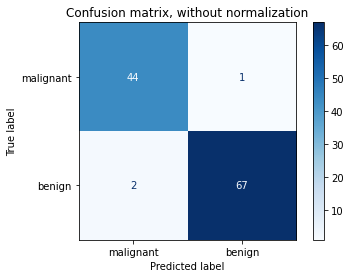

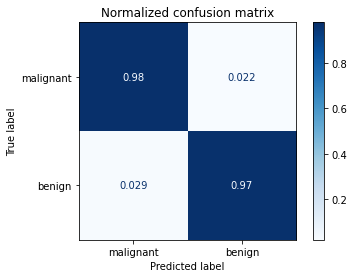

In [ ]:
from sklearn.metrics import plot_confusion_matrix

class_names = ['malignant','benign']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix","true")]
        
for title, normalize in titles_options:
  disp = plot_confusion_matrix(model, x_test, y_test,
                               display_labels=class_names,
                               cmap=plt.cm.Blues,normalize=normalize)
  disp.ax_.set_title(title)

  print(title)
  print(disp.confusion_matrix)

plt.show()